<a href="https://colab.research.google.com/github/osirisberbesia/laboratoria-riesgo-relativo/blob/main/Proyecto3_RiesgoRelativo_Hito3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import IPython

# Autenticar en Google Colab
auth.authenticate_user()

# Crear un cliente de BigQuery
client = bigquery.Client(project="id-riesgo")

# Consulta a BigQuery
query = f"""
SELECT
* FROM   `id-riesgo.datos_p3.unificado` ORDER BY id_usuario
"""

# Obtener todos los registros de la consulta y convertirlos en un DataFrame de Pandas
df = client.query(query).to_dataframe()

# Eliminar columnas que contienen 100% de valores NaN
df_cleaned = df.dropna(axis=1, how='all')

# Eliminar filas que contienen 100% de valores NaN
df_cleaned = df_cleaned.dropna(axis=0, how='all')

# Limpiar la salida de la ejecución anterior
IPython.display.clear_output()

# Mostrar el mensaje con la cantidad de datos y columnas
print(f"{len(df_cleaned)} datos traídos, con {df_cleaned.shape[1]} columnas")

# Mostrar todo el DataFrame de forma bonita y compacta
IPython.display.display(df_cleaned)

# Mostrar los encabezados del DataFrame
print("Encabezados del DataFrame:")
print(", ".join(df_cleaned.columns))

34971 datos traídos, con 26 columnas


,id_usuario,edad,edad_cuartil,dummy_edad,salario,dependents,using_lines_not_secured,lines_category_using,deudas_sobre_patrimonio,debt_r_categoria,...,categoria_atrasos,flag,grupo_pago,total_loans,cuartil_total_loans,dummy_total_loans,dummy_score,score,conteo_others,conteo_real_estate
0,1,55,Cuartil 3 (53-63),0,2200,0,0.67,Alto uso,0.153112,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,3,Cuartil 1 (0-5),1,010,Buen pagador,3,0
1,2,44,Cuartil 2 (43-52),1,7499,0,0.01,Muy bajo uso,0.148800,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,20,Cuartil 4 (+12),0,001,Buen pagador,19,1
2,3,54,Cuartil 3 (53-63),0,5900,0,0.09,Bajo uso,0.351635,Seguro,...,Se ha atrasado muy poco y mayormente en period...,0,Paga bien,15,Cuartil 4 (+12),0,000,Buen pagador,14,1
3,4,54,Cuartil 3 (53-63),0,2167,0,0.11,Bajo uso,0.065959,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,3,Cuartil 1 (0-5),1,010,Buen pagador,3,0
4,5,42,Cuartil 1 (21-42),1,10415,2,0.32,Uso moderado,0.352151,Seguro,...,Nunca se ha atrasado,0,Paga bien,8,Cuartil 2 (6-8),0,001,Buen pagador,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34966,35996,68,Cuartil 4 (+64),0,10833,0,0.00,Muy bajo uso,0.062858,Muy seguro,...,Se ha atrasado pocas veces y mayormente en per...,0,Paga bien,9,Cuartil 3 (9-11),0,100,Mal pagador,9,0
34967,35997,84,Cuartil 4 (+64),0,8456,0,0.06,Bajo uso,0.013598,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,7,Cuartil 2 (6-8),0,000,Buen pagador,7,0
34968,35998,70,Cuartil 4 (+64),0,6000,0,0.82,Alto uso,0.663056,Moderado,...,Nunca se ha atrasado,0,Paga bien,17,Cuartil 4 (+12),0,000,Buen pagador,15,2
34969,35999,64,Cuartil 4 (+64),0,5045,0,0.11,Bajo uso,0.865438,Riesgo,...,Se ha atrasado pocas veces y mayormente en per...,0,Paga bien,12,Cuartil 4 (+12),0,000,Buen pagador,8,4


Encabezados del DataFrame:
id_usuario, edad, edad_cuartil, dummy_edad, salario, dependents, using_lines_not_secured, lines_category_using, deudas_sobre_patrimonio, debt_r_categoria, delay_30_59, delay_60_89, delay_more_90, categoria_more90, dummy_more_90, acumulado_atrasos, categoria_atrasos, flag, grupo_pago, total_loans, cuartil_total_loans, dummy_total_loans, dummy_score, score, conteo_others, conteo_real_estate


In [4]:

# 'edad_cuartil', 'lines_category_using', 'debt_r_categoria',
#'categoria_more90', 'categoria_atrasos', 'grupo_pago', 'cuartil_total_loans'

# display(df_cleaned) -- para verificar que no me ha puesto datos de más

train = df_cleaned
train.head(3)



,id_usuario,edad,edad_cuartil,dummy_edad,salario,dependents,using_lines_not_secured,lines_category_using,deudas_sobre_patrimonio,debt_r_categoria,...,categoria_atrasos,flag,grupo_pago,total_loans,cuartil_total_loans,dummy_total_loans,dummy_score,score,conteo_others,conteo_real_estate
0,1,55,Cuartil 3 (53-63),0,2200,0,0.67,Alto uso,0.153112,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,3,Cuartil 1 (0-5),1,010,Buen pagador,3,0
1,2,44,Cuartil 2 (43-52),1,7499,0,0.01,Muy bajo uso,0.148800,Muy seguro,...,Nunca se ha atrasado,0,Paga bien,20,Cuartil 4 (+12),0,001,Buen pagador,19,1
2,3,54,Cuartil 3 (53-63),0,5900,0,0.09,Bajo uso,0.351635,Seguro,...,Se ha atrasado muy poco y mayormente en period...,0,Paga bien,15,Cuartil 4 (+12),0,000,Buen pagador,14,1


In [ ]:
train[['edad','dummy_edad']].head()

,edad,dummy_edad
0,55,0
1,44,1
2,54,0
3,54,0
4,42,1


<Axes: xlabel='edad', ylabel='dummy_edad'>

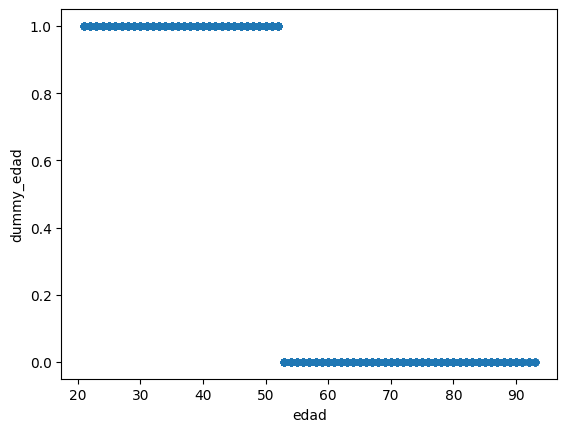

In [ ]:
train[['edad','dummy_edad']].plot.scatter(x='edad',y='dummy_edad')

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Supongamos que 'train' es tu DataFrame real que contiene las columnas 'edad' y 'dummy_edad'
# Asegúrate de que 'train' esté previamente definido con tus datos

# Separar las características (X) y la variable objetivo (y)
X = train[['edad']].values
y = train['dummy_edad'].values

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b)
w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')


Coeficiente w: -9.105467467609884
Intercepto b: 478.018524275786


In [6]:
# Revisar el rango de la variable 'edad'
edad_min = train['edad'].min()
edad_max = train['edad'].max()
print(f'Rango de edad: {edad_min} - {edad_max}')

# Revisar la distribución de la variable 'dummy_edad'
dummy_counts = train['dummy_edad'].value_counts()
print('Distribución de dummy_edad:')
print(dummy_counts)

# Mostrar algunas estadísticas descriptivas de la variable 'edad'
print('Estadísticas descriptivas de la variable edad:')
print(train['edad'].describe())


Rango de edad: 21 - 93
Distribución de dummy_edad:
dummy_edad
1    17988
0    16983
Name: count, dtype: Int64
Estadísticas descriptivas de la variable edad:
count      34971.0
mean     52.378028
std      14.516291
min           21.0
25%           42.0
50%           52.0
75%           63.0
max           93.0
Name: edad, dtype: Float64


Coeficiente w: -0.04028394077009822
Intercepto b: -2.045313772851711


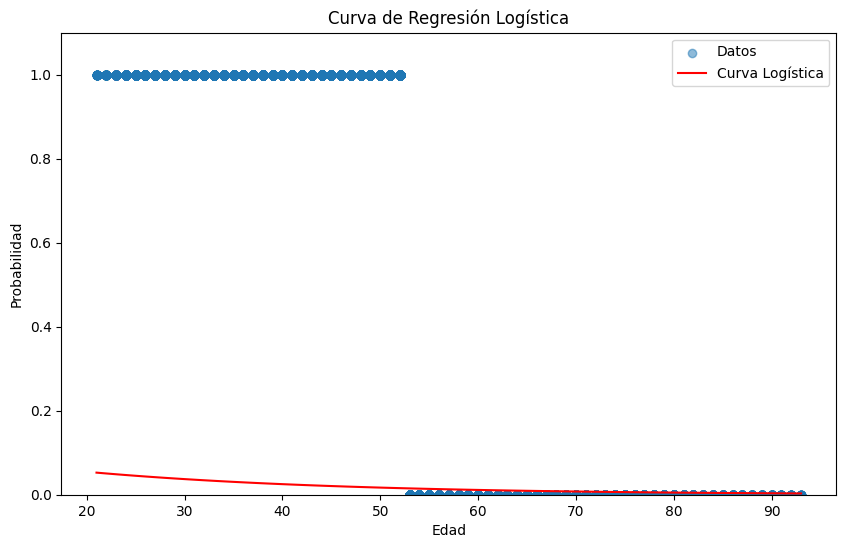

In [62]:
X = train[['edad']].values  # Variable predictora continua
y = train['flag'].values  # Variable objetivo binaria


model = LogisticRegression()
model.fit(X, y)

w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')


x = np.linspace(X.min(), X.max(), 100)
y_prob = 1 / (1 + np.exp(-(w * x + b)))

# Gráfica de la recta
plt.figure(figsize=(10, 6))
plt.scatter(train['edad'], train['dummy_edad'], alpha=0.5, label='Datos')
plt.plot(x, y_prob, '-r', label='Curva Logística')
plt.ylim(0, 1.1)
plt.xlabel('Edad')
plt.ylabel('Probabilidad')
plt.title('Curva de Regresión Logística')
plt.legend()
plt.show()



Coeficiente w: 2.072388805377929
Intercepto b: -5.04487758113591


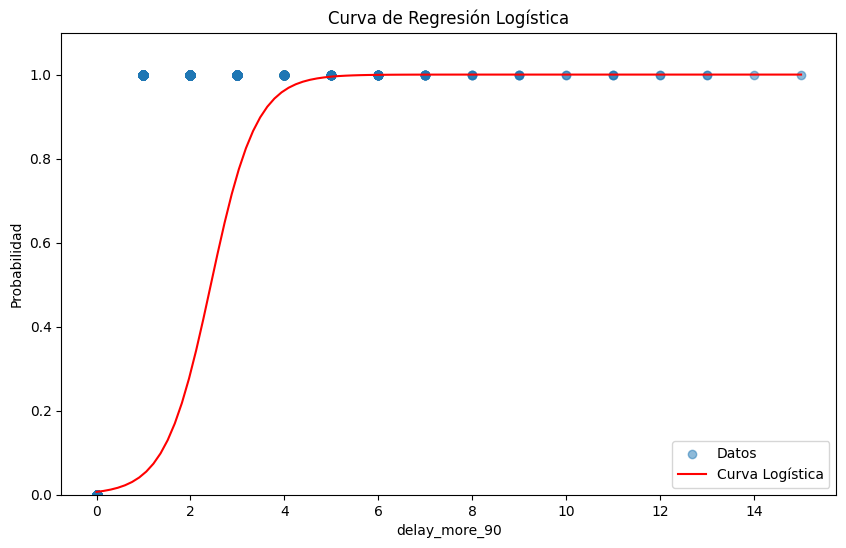

In [68]:
X = train[['delay_more_90']].values  # Variable predictora continua
y = train['flag'].values  # Variable objetivo binaria


model = LogisticRegression()
model.fit(X, y)

w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')


x = np.linspace(X.min(), X.max(), 100)
y_prob = 1 / (1 + np.exp(-(w * x + b)))

# Gráfica de la recta
plt.figure(figsize=(10, 6))
plt.scatter(train['delay_more_90'], train['dummy_more_90'], alpha=0.5, label='Datos')
plt.plot(x, y_prob, '-r', label='Curva Logística')
plt.ylim(0, 1.1)
plt.xlabel('delay_more_90')
plt.ylabel('Probabilidad')
plt.title('Curva de Regresión Logística')
plt.legend()
plt.show()

Coeficiente w: -0.08963709676302216
Intercepto b: -3.3086878964107433


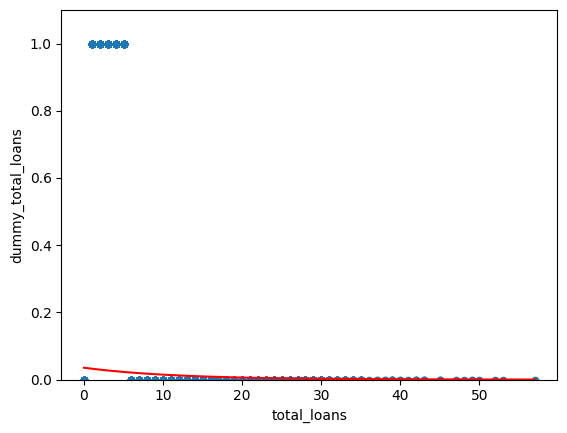

In [69]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression


# Extraer las variables predictoras y la variable objetivo
X = train[['total_loans']].values  # Variable predictora
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')
# puntos de la recta
x = np.linspace(0,train['total_loans'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='total_loans',y='dummy_total_loans')
plt.plot(x, y, '-r')
plt.ylim(0,train['dummy_total_loans'].max()*1.1)
# plt.grid()
plt.show()

Coeficiente w: -0.07803073555419218
Intercepto b: 0.6005187455131118
Precisión: 0.53
Confusion Matrix:
[[18169 16172]
 [  217   413]]


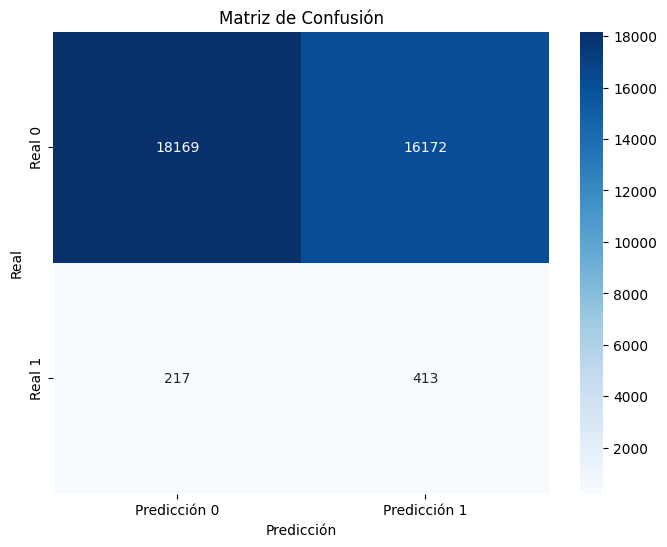

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.53      0.69     34341
         1.0       0.02      0.66      0.05       630

    accuracy                           0.53     34971
   macro avg       0.51      0.59      0.37     34971
weighted avg       0.97      0.53      0.68     34971



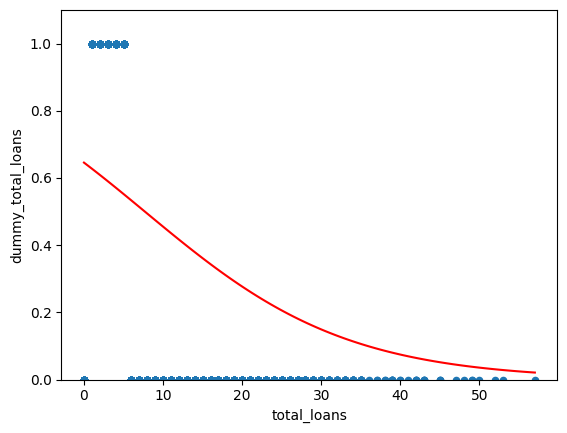

In [70]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer las variables predictoras y la variable objetivo
X = train[['total_loans']].values  # Variable predictora
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)

# puntos de la recta
x = np.linspace(0,train['total_loans'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
train.plot.scatter(x='total_loans',y='dummy_total_loans')
plt.plot(x, y, '-r')
plt.ylim(0,train['dummy_total_loans'].max()*1.1)
# plt.grid()
plt.show()


### Métricas del Reporte de Clasificación

**Precision (Precisión):**
- **Definición:** La proporción de verdaderos positivos sobre el total de predicciones positivas realizadas (es decir, la cantidad de veces que el modelo predijo correctamente una clase positiva frente a cuántas veces predijo esa clase positiva).
  - **Para la clase 0.0:** 0.99  
    Significa que el modelo predijo correctamente el 99% de las veces cuando predijo la clase 0.0.
  - **Para la clase 1.0:** 0.03  
    Significa que el modelo predijo correctamente el 3% de las veces cuando predijo la clase 1.0.

**Recall (Sensibilidad o Exhaustividad):**
- **Definición:** La proporción de verdaderos positivos sobre el total de instancias reales positivas (es decir, la cantidad de veces que el modelo identificó correctamente una instancia positiva frente a cuántas instancias positivas realmente había).
  - **Para la clase 0.0:** 0.72  
    Significa que el modelo identificó correctamente el 72% de todas las instancias que eran realmente la clase 0.0.
  - **Para la clase 1.0:** 0.48  
    Significa que el modelo identificó correctamente el 48% de todas las instancias que eran realmente la clase 1.0.

**F1-Score:**
- **Definición:** La media armónica entre la precisión y la sensibilidad, proporcionando una única métrica que combina ambos aspectos.
  - **Para la clase 0.0:** 0.83  
    Indica un equilibrio alto entre precisión y recall para la clase 0.0.
  - **Para la clase 1.0:** 0.06  
    Indica un equilibrio muy bajo entre precisión y recall para la clase 1.0, sugiriendo que el modelo tiene dificultades significativas con esta clase.

**Support (Soporte):**
- **Definición:** El número de instancias verdaderas de cada clase en el conjunto de datos.
  - **Para la clase 0.0:** 34,341  
    Hay 34,341 instancias verdaderas de la clase 0.0 en el conjunto de datos.
  - **Para la clase 1.0:** 630  
    Hay 630 instancias verdaderas de la clase 1.0 en el conjunto de datos.

**Accuracy (Precisión Global):**
- **Definición:** La proporción de todas las predicciones correctas (tanto positivas como negativas) sobre el total de instancias.
  - **0.71:** El modelo es correcto en el 71% de las veces.

**Macro Average:**
- **Definición:** La media de las métricas de precisión, recall y F1-Score para cada clase, calculada de manera independiente.
  - **Precision:** 0.51
  - **Recall:** 0.60
  - **F1-Score:** 0.44  
    Proporciona una visión general de cómo el modelo se desempeña en todas las clases sin tener en cuenta el desequilibrio entre clases.

**Weighted Average:**
- **Definición:** La media ponderada de las métricas de precisión, recall y F1-Score para cada clase, ponderada por el número de instancias de cada clase.
  - **Precision:** 0.97
  - **Recall:** 0.71
  - **F1-Score:** 0.82  
    Proporciona una visión general del desempeño del modelo teniendo en cuenta el desequilibrio de clases.

### Interpretación de los Resultados

- **Precisión alta para la clase 0.0** sugiere que el modelo es muy bueno para identificar instancias de la clase 0.0.
- **Precisión baja para la clase 1.0** indica que el modelo tiene problemas significativos para identificar instancias de la clase 1.0 correctamente. Esto puede ser un signo de que la clase 1.0 está subrepresentada en comparación con la clase 0.0.
- **Recall relativamente bajo para la clase 0.0** y **recall moderado para la clase 1.0** sugieren que, aunque el modelo es bastante bueno en identificar la clase mayoritaria, tiene un desempeño desigual entre las clases.
- **F1-Score bajo para la clase 1.0** indica un equilibrio deficiente entre precisión y recall para esta clase, sugiriendo que el modelo necesita mejoras en la identificación de instancias de la clase 1.0.

Estos resultados indican que el modelo tiene un desempeño más equilibrado en términos de precisión y recall cuando se trata de la clase mayoritaria (0.0), pero tiene dificultades significativas con la clase minoritaria (1.0). Esto puede ser indicativo de un problema de desbalance en los datos, donde la clase minoritaria está insuficientemente representada.


Coeficiente w: 5.596975422177662
Intercepto b: -2.379613764646973
Precisión: 0.96
Confusion Matrix:
[[33099  1242]
 [   56   574]]


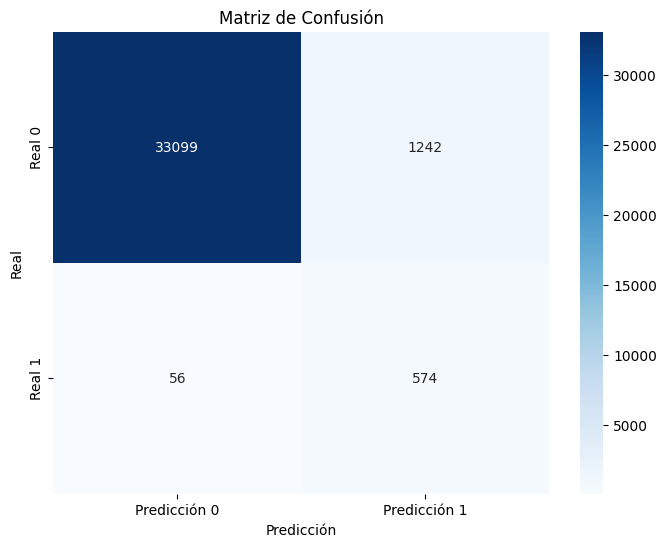

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     34341
         1.0       0.32      0.91      0.47       630

    accuracy                           0.96     34971
   macro avg       0.66      0.94      0.73     34971
weighted avg       0.99      0.96      0.97     34971



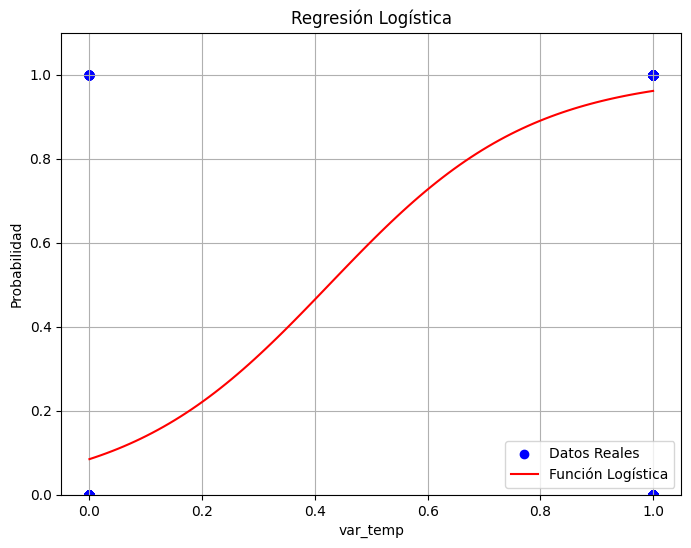

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

train['var_temp'] = train['score'].map({'Buen pagador': 0, 'Mal pagador': 1})

X = train[['var_temp']].values  # Variable predictora
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'Precisión: {accuracy:.2f}')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('Classification Report:')
print(class_report)

# Puntos de la recta
x = np.linspace(0, train['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(train['var_temp'], y, color='blue', label='Datos Reales')

# Graficar la función logística
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('var_temp')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()



### Métricas del Reporte de Clasificación

**Precision (Precisión):**
- **Definición:** La proporción de verdaderos positivos sobre el total de predicciones positivas realizadas (es decir, la cantidad de veces que el modelo predijo correctamente una clase positiva frente a cuántas veces predijo esa clase positiva).
  - **Para la clase 0.0:** 1.00  
    Significa que el modelo predijo correctamente el 100% de las veces cuando predijo la clase 0.0.
  - **Para la clase 1.0:** 0.32  
    Significa que el modelo predijo correctamente el 32% de las veces cuando predijo la clase 1.0.

**Recall (Sensibilidad o Exhaustividad):**
- **Definición:** La proporción de verdaderos positivos sobre el total de instancias reales positivas (es decir, la cantidad de veces que el modelo identificó correctamente una instancia positiva frente a cuántas instancias positivas realmente había).
  - **Para la clase 0.0:** 0.96  
    Significa que el modelo identificó correctamente el 96% de todas las instancias que eran realmente la clase 0.0.
  - **Para la clase 1.0:** 0.91  
    Significa que el modelo identificó correctamente el 91% de todas las instancias que eran realmente la clase 1.0.

**F1-Score:**
- **Definición:** La media armónica entre la precisión y la sensibilidad, proporcionando una única métrica que combina ambos aspectos.
  - **Para la clase 0.0:** 0.98  
    Indica un equilibrio muy alto entre precisión y recall para la clase 0.0.
  - **Para la clase 1.0:** 0.47  
    Indica un equilibrio bajo entre precisión y recall para la clase 1.0, sugiriendo que el modelo tiene dificultades con esta clase.

**Support (Soporte):**
- **Definición:** El número de instancias verdaderas de cada clase en el conjunto de datos.
  - **Para la clase 0.0:** 34,341  
    Hay 34,341 instancias verdaderas de la clase 0.0 en el conjunto de datos.
  - **Para la clase 1.0:** 630  
    Hay 630 instancias verdaderas de la clase 1.0 en el conjunto de datos.

**Accuracy (Precisión Global):**
- **Definición:** La proporción de todas las predicciones correctas (tanto positivas como negativas) sobre el total de instancias.
  - **0.96:** El modelo es correcto en el 96% de las veces.

**Macro Average:**
- **Definición:** La media de las métricas de precisión, recall y F1-Score para cada clase, calculada de manera independiente.
  - **Precision:** 0.66
  - **Recall:** 0.94
  - **F1-Score:** 0.73  
    Proporciona una visión general de cómo el modelo se desempeña en todas las clases sin tener en cuenta el desequilibrio entre clases.

**Weighted Average:**
- **Definición:** La media ponderada de las métricas de precisión, recall y F1-Score para cada clase, ponderada por el número de instancias de cada clase.
  - **Precision:** 0.99
  - **Recall:** 0.96
  - **F1-Score:** 0.97  
    Proporciona una visión general del desempeño del modelo teniendo en cuenta el desequilibrio de clases.

### Interpretación de los Resultados

- **Precisión alta para la clase 0.0** sugiere que el modelo es muy bueno para identificar instancias de la clase 0.0.
- **Precisión baja para la clase 1.0** indica que el modelo tiene problemas para identificar instancias de la clase 1.0 correctamente. Esto puede ser un signo de que la clase 1.0 está subrepresentada en comparación con la clase 0.0.
- **Recall alto para la clase 1.0** sugiere que el modelo es bastante bueno en identificar instancias reales de la clase 1.0, aunque con una precisión baja.

Estos resultados indican que el modelo tiene un desempeño muy bueno en identificar la clase mayoritaria (0.0), pero tiene dificultades con la clase minoritaria (1.0). Esto es común en problemas de clasificación desbalanceada, donde el modelo tiende a ser más preciso con la clase mayoritaria y puede ser menos confiable con la clase minoritaria.


Coeficiente w: 5.596975422177662
Intercepto b: -2.379613764646973

Interpretación:
El coeficiente w es positivo (5.60), lo que indica que a medida que la variable predictora ("var_temp") aumenta, la probabilidad de que la variable objetivo ("flag") sea 1 también aumenta.
El intercepto b es -2.38. Esto representa la probabilidad de que "flag" sea 1 cuando la variable predictora es 0.

Precisión: 0.96

Interpretación:
La precisión del modelo es 0.96. Esto indica que el modelo clasifica correctamente el 96.29% de las instancias.

Matriz de Confusión:
[[33099  1242]
 [   56   574]]

Interpretación:
La matriz de confusión muestra el desempeño del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos según la siguiente interpretación:
Verdadero Negativo (VN): 574
Falso Positivo (FP): 56
Falso Negativo (FN): 1242
Verdadero Positivo (VP): 33099


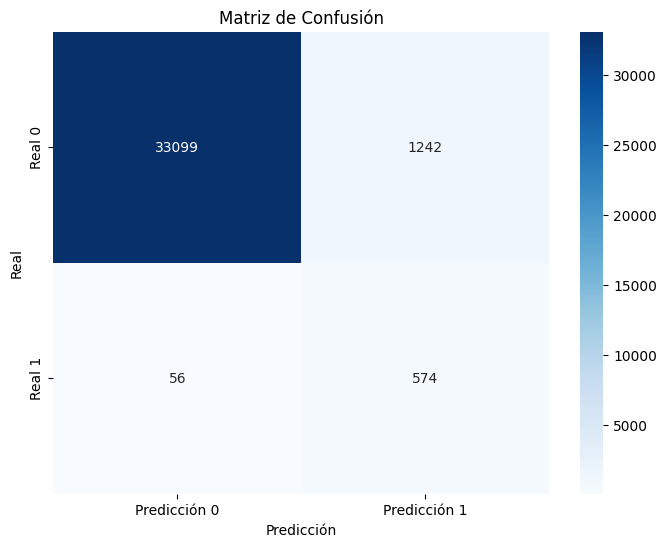


Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     34341
         1.0       0.32      0.91      0.47       630

    accuracy                           0.96     34971
   macro avg       0.66      0.94      0.73     34971
weighted avg       0.99      0.96      0.97     34971


Interpretación:
El reporte de clasificación proporciona métricas adicionales sobre el rendimiento del modelo.
La Precisión indica la proporción de verdaderos positivos entre todas las predicciones positivas realizadas.
El Recall (o Sensibilidad) indica la proporción de verdaderos positivos entre todos los positivos reales.
El F1-Score es la media armónica entre la Precisión y el Recall, proporcionando una métrica única que equilibra ambos aspectos.


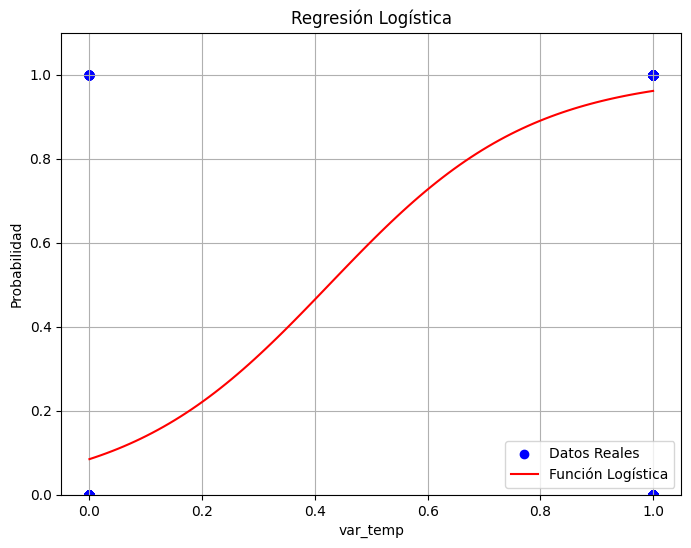


Interpretación del Gráfico de Regresión Logística:
El gráfico muestra la relación entre la variable predictora "var_temp" y la probabilidad estimada de que "flag" sea 1.
Los puntos azules representan los datos reales, mientras que la línea roja muestra la probabilidad estimada por el modelo.
La forma en S (sigmoide) de la línea indica cómo el modelo estima la probabilidad en función de la variable predictora.
Una pendiente pronunciada de la línea indica una fuerte relación entre la variable predictora y la probabilidad estimada.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'train' es el DataFrame ya cargado
train['var_temp'] = train['score'].map({'Buen pagador': 0, 'Mal pagador': 1})

X = train[['var_temp']].values  # Variable predictora
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística con class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Obtener los coeficientes (w) y el intercepto (b) del modelo ajustado
w = model.coef_[0][0]
b = model.intercept_[0]

print(f'Coeficiente w: {w}')
print(f'Intercepto b: {b}')

print('\nInterpretación:')
if w > 0:
    print(f'El coeficiente w es positivo ({w:.2f}), lo que indica que a medida que la variable predictora ("var_temp") aumenta, la probabilidad de que la variable objetivo ("flag") sea 1 también aumenta.')
else:
    print(f'El coeficiente w es negativo ({w:.2f}), lo que sugiere que a medida que la variable predictora ("var_temp") aumenta, la probabilidad de que la variable objetivo ("flag") sea 1 disminuye.')

print(f'El intercepto b es {b:.2f}. Esto representa la probabilidad de que "flag" sea 1 cuando la variable predictora es 0.')

# Hacer predicciones usando el modelo ajustado
y_pred = model.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, y_pred)
print(f'\nPrecisión: {accuracy:.2f}')

print('\nInterpretación:')
print(f'La precisión del modelo es {accuracy:.2f}. Esto indica que el modelo clasifica correctamente el {accuracy*100:.2f}% de las instancias.')

# Matriz de confusión
conf_matrix = confusion_matrix(y, y_pred)
print('\nMatriz de Confusión:')
print(conf_matrix)

print('\nInterpretación:')
print('La matriz de confusión muestra el desempeño del modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos según la siguiente interpretación:')
print(f'Verdadero Negativo (VN): {conf_matrix[1, 1]}')
print(f'Falso Positivo (FP): {conf_matrix[1, 0]}')
print(f'Falso Negativo (FN): {conf_matrix[0, 1]}')
print(f'Verdadero Positivo (VP): {conf_matrix[0, 0]}')

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
class_report = classification_report(y, y_pred, zero_division=0)
print('\nReporte de Clasificación:')
print(class_report)

print('\nInterpretación:')
print('El reporte de clasificación proporciona métricas adicionales sobre el rendimiento del modelo.')
print('La Precisión indica la proporción de verdaderos positivos entre todas las predicciones positivas realizadas.')
print('El Recall (o Sensibilidad) indica la proporción de verdaderos positivos entre todos los positivos reales.')
print('El F1-Score es la media armónica entre la Precisión y el Recall, proporcionando una métrica única que equilibra ambos aspectos.')

# Puntos de la recta
x = np.linspace(0, train['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(w * x + b)))

# Graficar la función logística
plt.figure(figsize=(8, 6))
plt.scatter(train['var_temp'], y, color='blue', label='Datos Reales')

# Graficar la función logística
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('var_temp')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

print('\nInterpretación del Gráfico de Regresión Logística:')
print('El gráfico muestra la relación entre la variable predictora "var_temp" y la probabilidad estimada de que "flag" sea 1.')
print('Los puntos azules representan los datos reales, mientras que la línea roja muestra la probabilidad estimada por el modelo.')
print('La forma en S (sigmoide) de la línea indica cómo el modelo estima la probabilidad en función de la variable predictora.')
print('Una pendiente pronunciada de la línea indica una fuerte relación entre la variable predictora y la probabilidad estimada.')


Precisión: 0.96

Matriz de Confusión:
[[33099  1242]
 [   56   574]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98     34341
         1.0       0.32      0.91      0.47       630

    accuracy                           0.96     34971
   macro avg       0.66      0.94      0.73     34971
weighted avg       0.99      0.96      0.97     34971



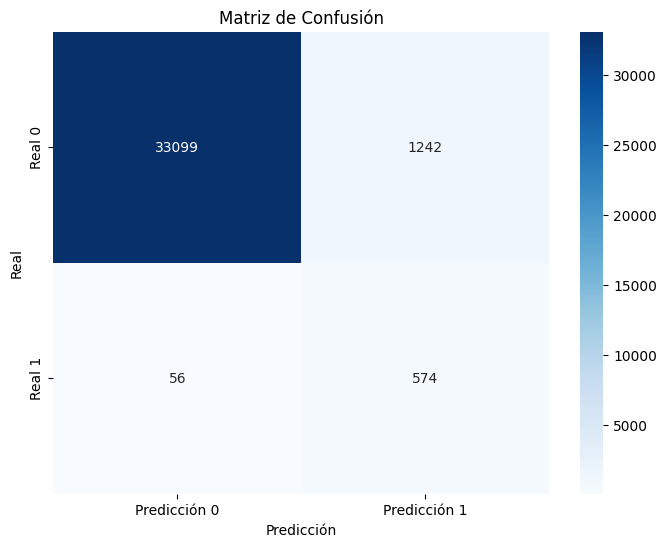

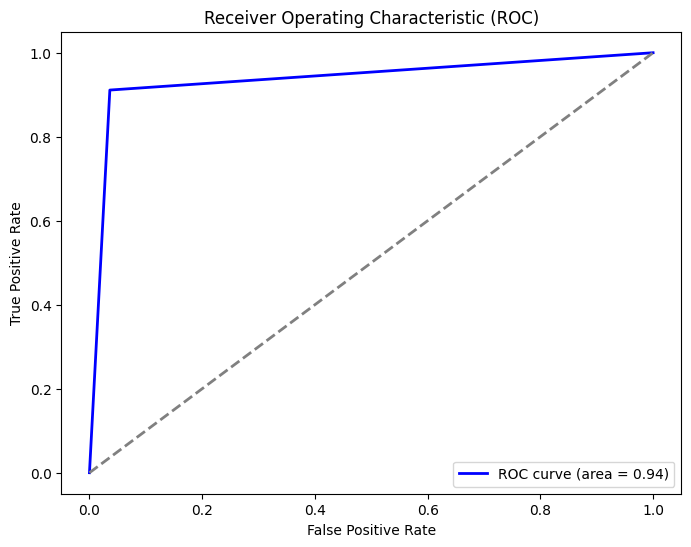

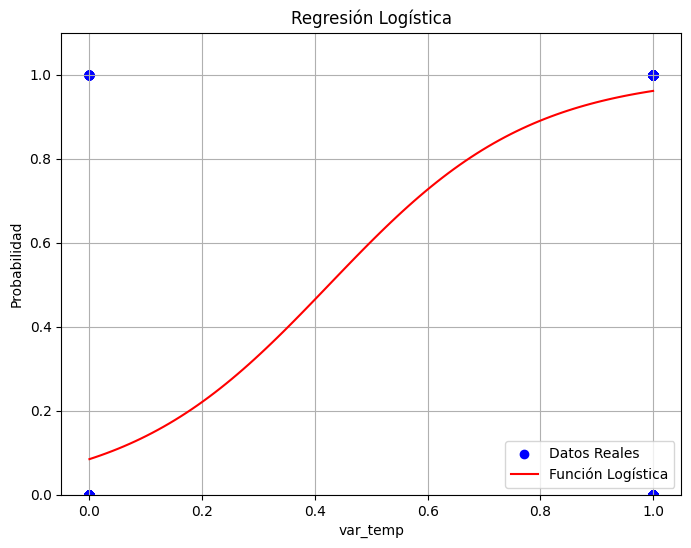

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# Supongamos que 'train' es tu DataFrame con las variables necesarias
train = df_cleaned
train['var_temp'] = train['score'].map({'Buen pagador': 0, 'Mal pagador': 1})

X = train[['var_temp']].values  # Variable predictora
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

print(f'Precisión: {accuracy:.2f}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Gráfico de la función logística
x = np.linspace(0, train['var_temp'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(model.coef_[0][0] * x + model.intercept_[0])))

plt.figure(figsize=(8, 6))
plt.scatter(train['var_temp'], y, color='blue', label='Datos Reales')
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('var_temp')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()


### 1. Gráfico de la Función Logística (Curva S)

**Descripción:**

- Este gráfico muestra cómo cambia la probabilidad estimada de pertenecer a la clase positiva (por ejemplo, riesgo crediticio alto) a medida que varía la variable predictora (`var_temp` en tu caso).
- La línea roja en forma de S (sigmoide) es la función logística que representa la relación entre la variable predictora y la probabilidad estimada.

**Interpretación:**

- **Eje X:** Muestra los valores de la variable predictora (`var_temp`).
- **Eje Y:** Muestra la probabilidad estimada de que la variable objetivo (`flag`) sea 1 (por ejemplo, probabilidad de riesgo alto).
- **Forma en S:** La forma en S de la curva indica que la probabilidad aumenta de manera gradual a medida que aumenta la variable predictora. Al principio, la probabilidad aumenta lentamente, luego se acelera, y finalmente se estabiliza.
- **Puntos de Datos:** Los puntos azules representan los datos reales. Puedes comparar cómo los puntos están distribuidos con la curva para ver si el modelo está ajustado a los datos.

**Ejemplo de Lectura:**

- Si `var_temp` es bajo, la probabilidad estimada de que `flag` sea 1 es baja.
- A medida que `var_temp` aumenta, la probabilidad también aumenta.
- La pendiente de la curva muestra cómo cambia la probabilidad con respecto a la variable predictora. Una pendiente más pronunciada indica una mayor influencia de la variable predictora en la probabilidad.

### 2. Gráfico de la Curva ROC (Receiver Operating Characteristic)

**Descripción:**

- La Curva ROC muestra la tasa de verdaderos positivos frente a la tasa de falsos positivos para diferentes umbrales de clasificación.
- La línea diagonal gris representa el rendimiento de un clasificador aleatorio.

**Interpretación:**

- **Eje X (False Positive Rate, FPR):** La tasa de falsos positivos, que muestra la proporción de instancias negativas que el modelo ha clasificado incorrectamente como positivas.
- **Eje Y (True Positive Rate, TPR):** La tasa de verdaderos positivos, que muestra la proporción de instancias positivas que el modelo ha clasificado correctamente.
- **Curva Azul:** Muestra el rendimiento del modelo para todos los posibles umbrales de clasificación. Una curva más cerca del eje Y indica un mejor rendimiento.
- **Área Bajo la Curva (AUC):** El valor del área bajo la curva (AUC) proporciona una medida general de la capacidad del modelo para distinguir entre las clases. Un AUC cercano a 1 indica un buen rendimiento, mientras que un AUC cercano a 0.5 indica un rendimiento cercano al azar.

**Ejemplo de Lectura:**

- Un AUC de 0.8 o más es generalmente considerado bueno, indicando que el modelo tiene una buena capacidad para distinguir entre las clases.
- La forma de la curva muestra cómo varía la tasa de verdaderos positivos con la tasa de falsos positivos a medida que cambian los umbrales de clasificación.

### Resumen de Interpretación

- **Gráfico de la Función Logística:** Muestra cómo la probabilidad estimada cambia con la variable predictora. La curva en S indica una relación sigmoide entre la variable predictora y la probabilidad de la clase positiva.

- **Gráfico ROC:** Evalúa el rendimiento del modelo en términos de su capacidad para distinguir entre las clases. Una curva más cercana a la esquina superior izquierda y un AUC más alto indican un mejor rendimiento del modelo.

Estos gráficos te ayudarán a evaluar cómo de bien tu modelo de regresión logística está funcionando y a interpretar la relación entre las variables predictoras y la probabilidad estimada de pertenecer a la clase positiva.


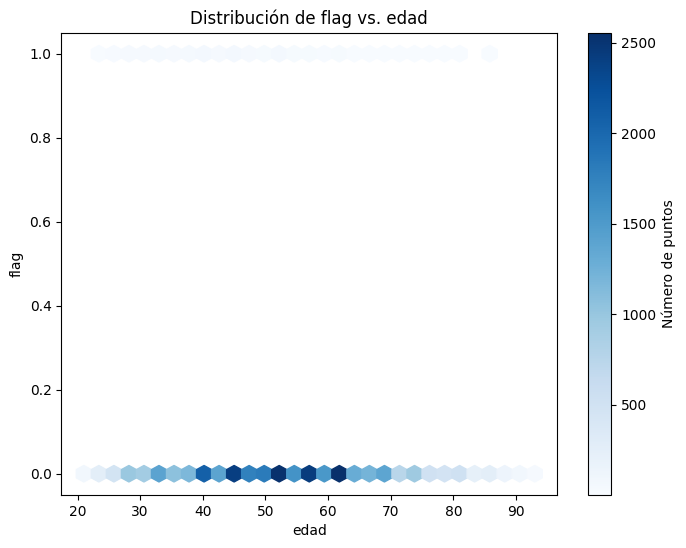

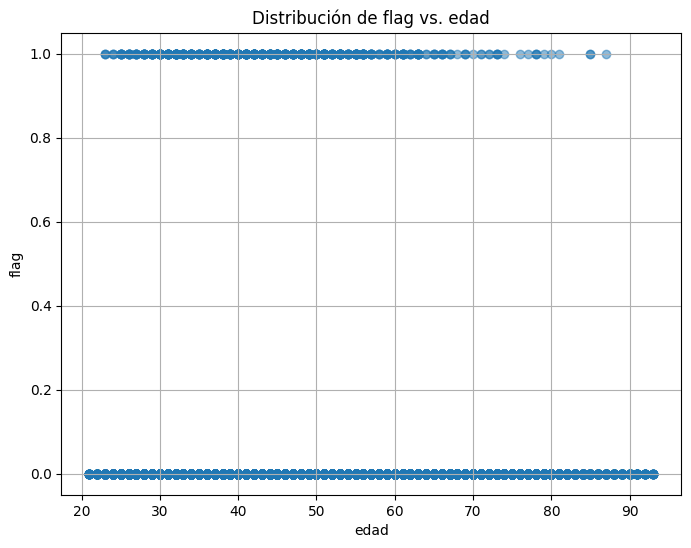

In [ ]:
# Gráfico de dispersión con histograma 2D
fig, ax = plt.subplots(figsize=(8, 6))
hb = ax.hexbin(train['edad'], train['flag'], gridsize=30, cmap='Blues', mincnt=1)
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Número de puntos')

ax.set_xlabel('edad')
ax.set_ylabel('flag')
ax.set_title('Distribución de flag vs. edad')

plt.show()

# Alternativa: Gráfico de dispersión simple
plt.figure(figsize=(8, 6))
plt.scatter(train['edad'], train['flag'], alpha=0.5)
plt.xlabel('edad')
plt.ylabel('flag')
plt.title('Distribución de flag vs. edad')
plt.grid(True)
plt.show()

Precisión: 0.54

Matriz de Confusión:
[[18502 15839]
 [  195   435]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.54      0.70     34341
         1.0       0.03      0.69      0.05       630

    accuracy                           0.54     34971
   macro avg       0.51      0.61      0.37     34971
weighted avg       0.97      0.54      0.69     34971



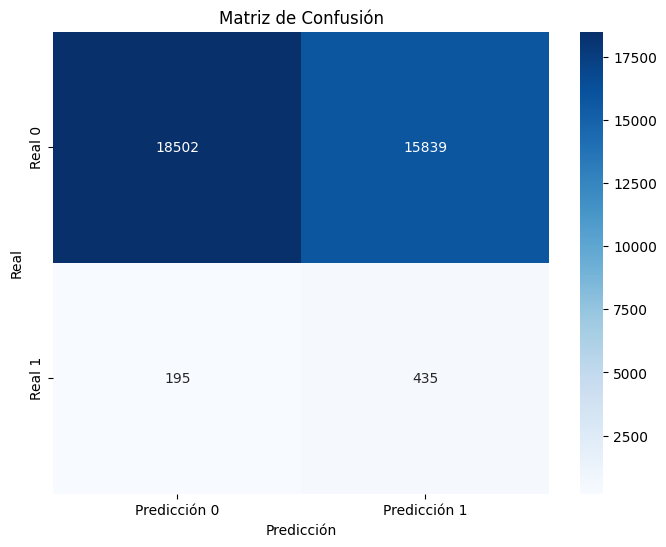

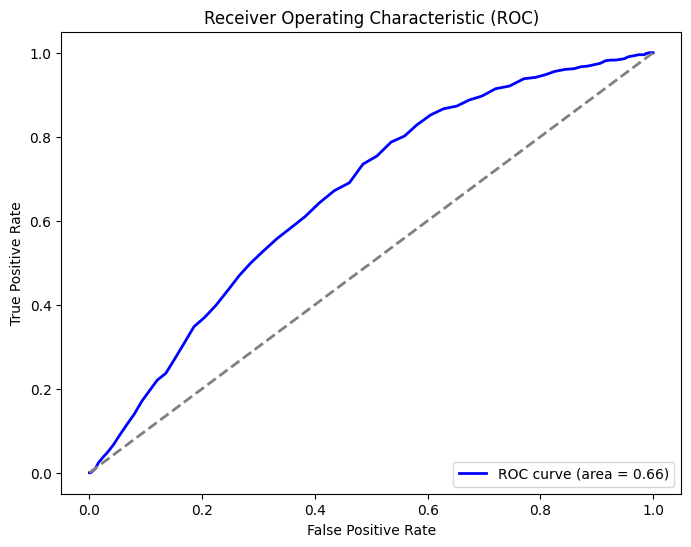

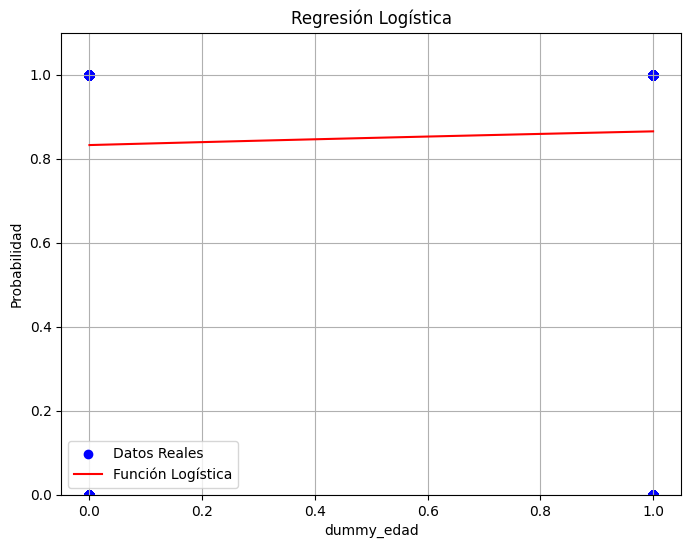

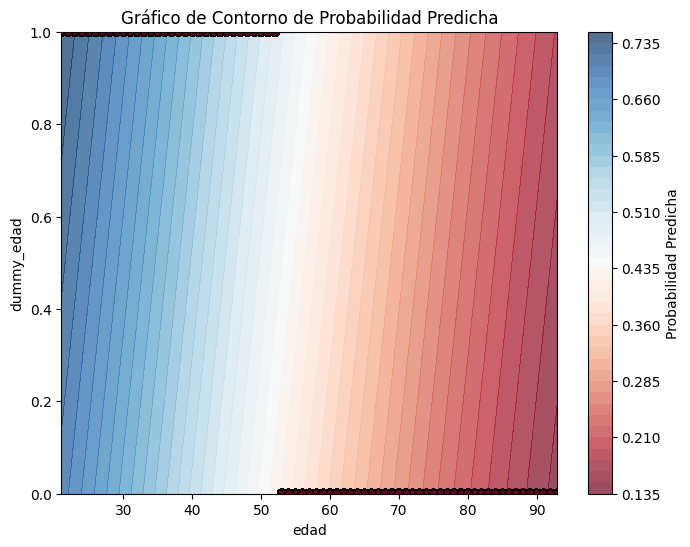

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
# Asegúrate de que 'train' es tu DataFrame con las variables necesarias
# Convertir 'score' a 'var_temp' (suponiendo que esto se necesita)
train['var_temp'] = train['score'].map({'Buen pagador': 0, 'Mal pagador': 1})

# Definir las variables predictoras (X) y la variable objetivo (y)
X = train[['edad', 'dummy_edad']].values  # Variables 'edad' y 'dummy_edad' como predictoras
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

print(f'Precisión: {accuracy:.2f}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Gráfico de la función logística para 'dummy_edad'
x = np.linspace(0, train['dummy_edad'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(model.coef_[0][1] * x + model.intercept_[0])))

plt.figure(figsize=(8, 6))
plt.scatter(train['dummy_edad'], y, color='blue', label='Datos Reales')
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('dummy_edad')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# Crear una malla de puntos para 'edad' y 'dummy_edad'
edad_min, edad_max = train['edad'].min(), train['edad'].max()
dummy_edad_min, dummy_edad_max = train['dummy_edad'].min(), train['dummy_edad'].max()
edad_range = np.linspace(edad_min, edad_max, 100)
dummy_edad_range = np.linspace(dummy_edad_min, dummy_edad_max, 100)
edad_mesh, dummy_edad_mesh = np.meshgrid(edad_range, dummy_edad_range)

# Calcular los valores de flag para cada punto de la malla
mesh_points = np.c_[edad_mesh.ravel(), dummy_edad_mesh.ravel()]
z = model.predict_proba(mesh_points)[:, 1].reshape(edad_mesh.shape)

# Graficar el contorno
plt.figure(figsize=(8, 6))
contour = plt.contourf(edad_mesh, dummy_edad_mesh, z, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(contour, label='Probabilidad Predicha')

plt.scatter(train['edad'], train['dummy_edad'], c=train['flag'], cmap='RdBu', edgecolors='k')
plt.xlabel('edad')
plt.ylabel('dummy_edad')
plt.title('Gráfico de Contorno de Probabilidad Predicha')
plt.show()


Precisión: 0.54

Matriz de Confusión:
[[18502 15839]
 [  195   435]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.99      0.54      0.70     34341
         1.0       0.03      0.69      0.05       630

    accuracy                           0.54     34971
   macro avg       0.51      0.61      0.37     34971
weighted avg       0.97      0.54      0.69     34971



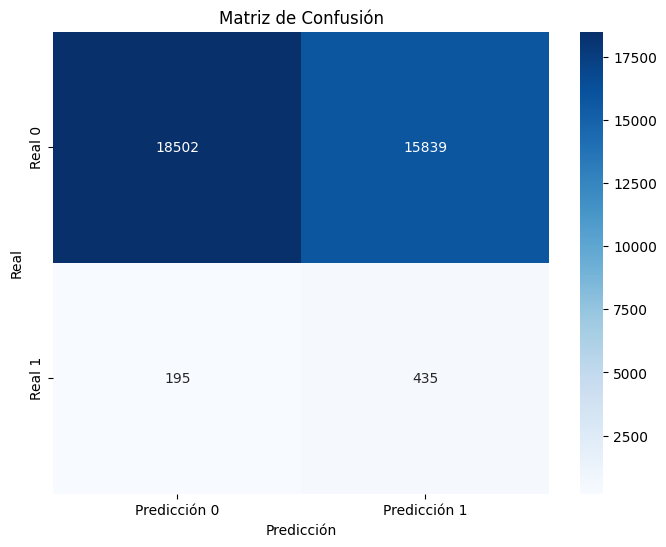

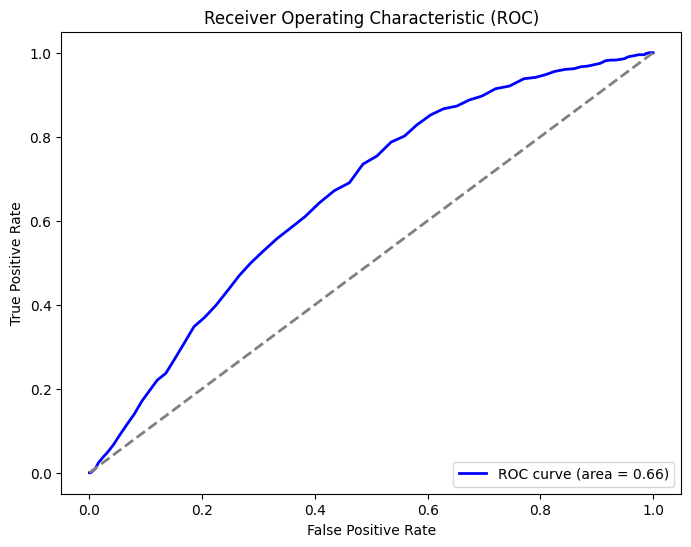

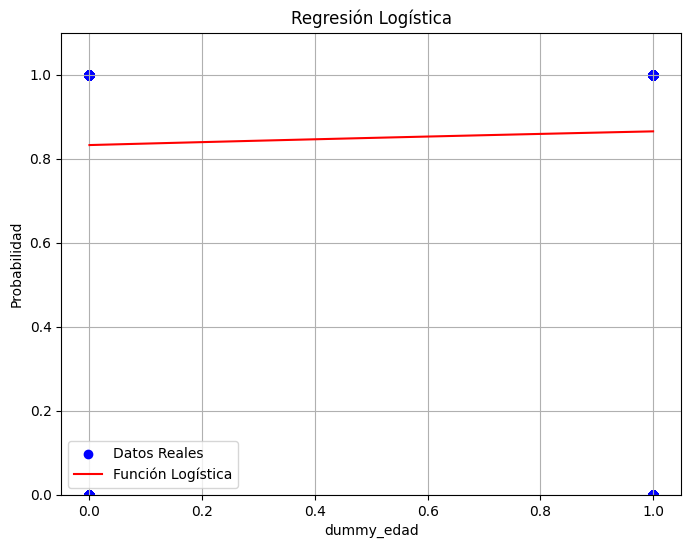

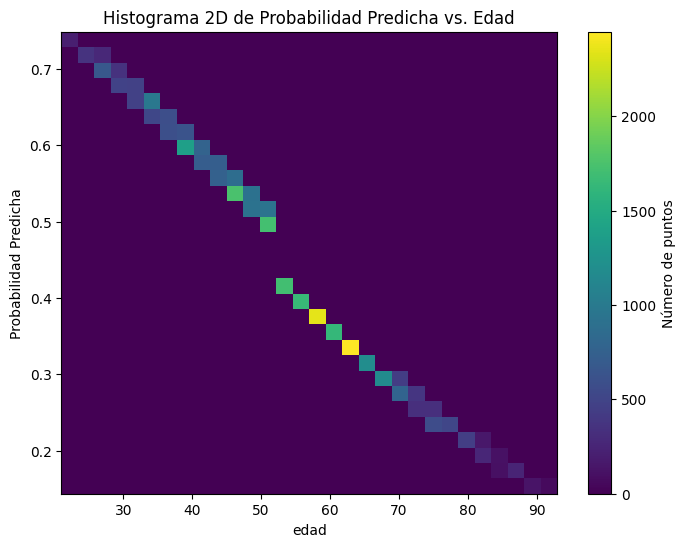

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# Cargar datos
# Supongamos que 'train' es tu DataFrame con las variables necesarias
train['var_temp'] = train['score'].map({'Buen pagador': 0, 'Mal pagador': 1})

X = train[['edad', 'dummy_edad']].values  # Variables 'edad' y 'dummy_edad' como predictoras
y = train['flag'].values  # Variable objetivo

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)

# Hacer predicciones
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Calcular métricas de evaluación
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred, zero_division=0)

print(f'Precisión: {accuracy:.2f}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Gráfico de la función logística para 'dummy_edad'
x = np.linspace(0, train['dummy_edad'].max(), 100)
y_logistic = 1 / (1 + np.exp(-(model.coef_[0][1] * x + model.intercept_[0])))

plt.figure(figsize=(8, 6))
plt.scatter(train['dummy_edad'], y, color='blue', label='Datos Reales')
plt.plot(x, y_logistic, '-r', label='Función Logística')
plt.xlabel('dummy_edad')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True)
plt.show()

# Histograma bidimensional usando hist2d
plt.figure(figsize=(8, 6))
plt.hist2d(train['edad'], y_proba, bins=30, cmap='viridis')
plt.colorbar(label='Número de puntos')
plt.xlabel('edad')
plt.ylabel('Probabilidad Predicha')
plt.title('Histograma 2D de Probabilidad Predicha vs. Edad')
plt.show()


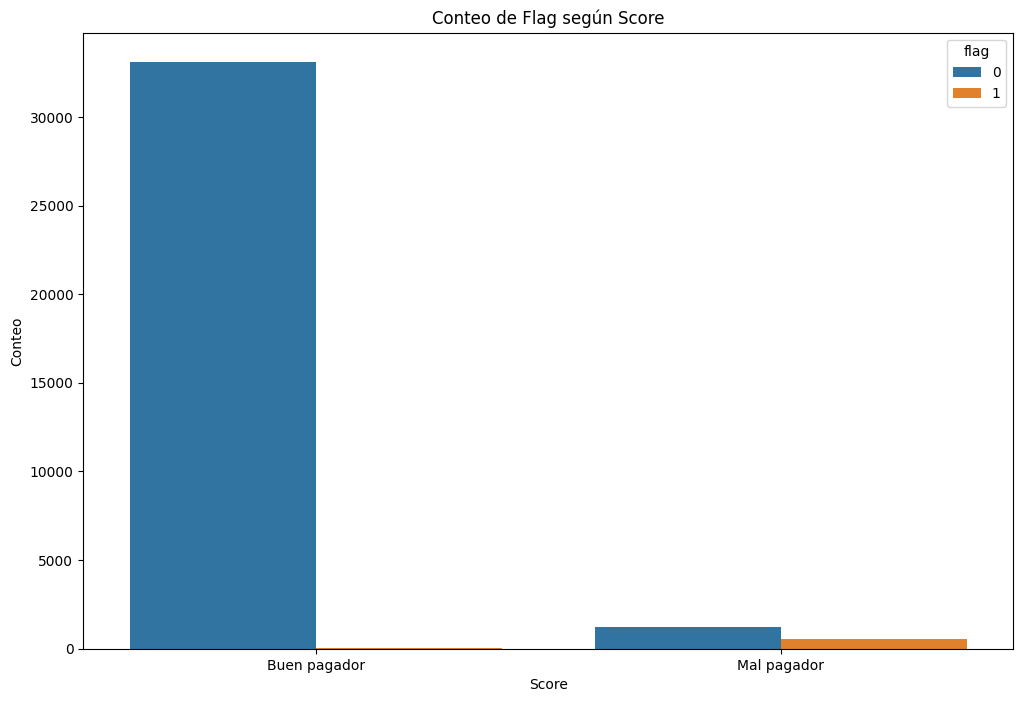

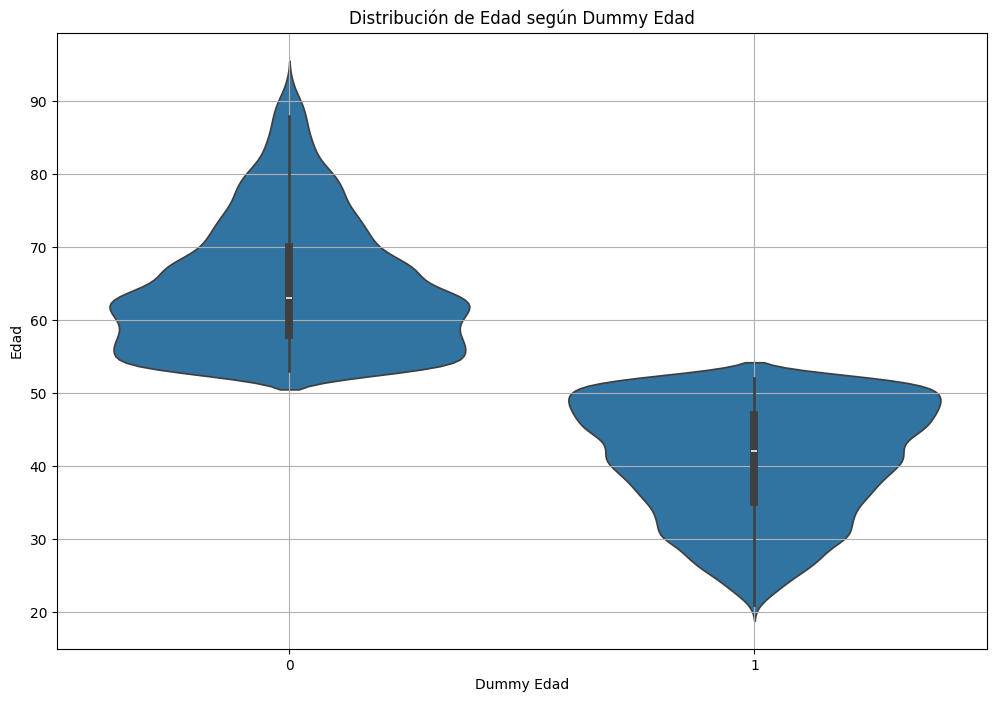

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'train' es tu DataFrame con las variables 'score', 'flag', y 'categoria_atrasos'


plt.figure(figsize=(12, 8))
sns.countplot(x='score', hue='flag', data=train)
plt.title('Conteo de Flag según Score')
plt.xlabel('Score')
plt.ylabel('Conteo')
plt.show()



# Crear la figura y el eje
plt.figure(figsize=(12, 8))

# Gráfico de violín para 'edad' según 'dummy_edad'
sns.violinplot(x='dummy_edad', y='edad', data=train)

# Configurar título y etiquetas
plt.title('Distribución de Edad según Dummy Edad')
plt.xlabel('Dummy Edad')
plt.ylabel('Edad')

# Configurar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()



